# Import Libraries

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import plotly.graph_objects as go

# Analysis Code

EGX_DLY_EGX30, 1D **********
Summary Statistics:
               open          high           low         close
count   3467.000000   3467.000000   3467.000000   3467.000000
mean   10273.047212  10349.720830  10208.701526  10277.758820
std     4505.887737   4551.637938   4470.351546   4511.948268
min     3591.870117   3622.350098   3578.120117   3586.550049
25%     6622.369873   6662.219971   6565.800050   6609.724853
50%     9817.370100   9873.700200   9769.000000   9827.460000
75%    13442.500000  13521.300000  13390.800000  13443.350000
max    30431.301000  30696.000000  29193.900000  30347.301000


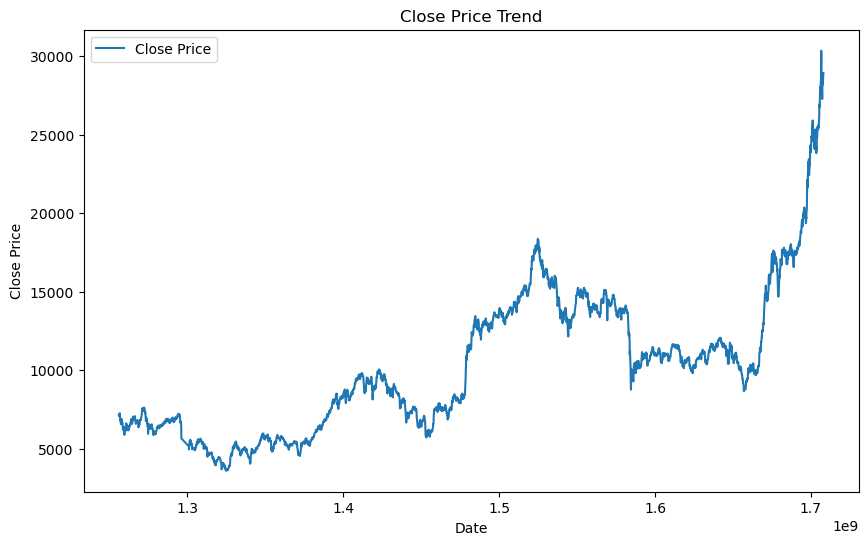

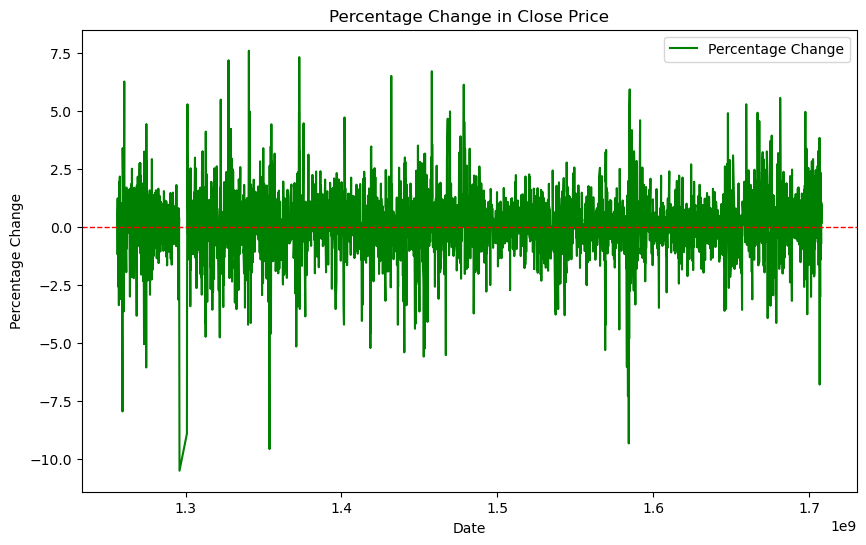

Correlation Matrix:
                       open      high       low     close  percentage_change
open               1.000000  0.999789  0.999712  0.999441           0.018791
high               0.999789  1.000000  0.999658  0.999744           0.032082
low                0.999712  0.999658  1.000000  0.999755           0.033655
close              0.999441  0.999744  0.999755  1.000000           0.046672
percentage_change  0.018791  0.032082  0.033655  0.046672           1.000000


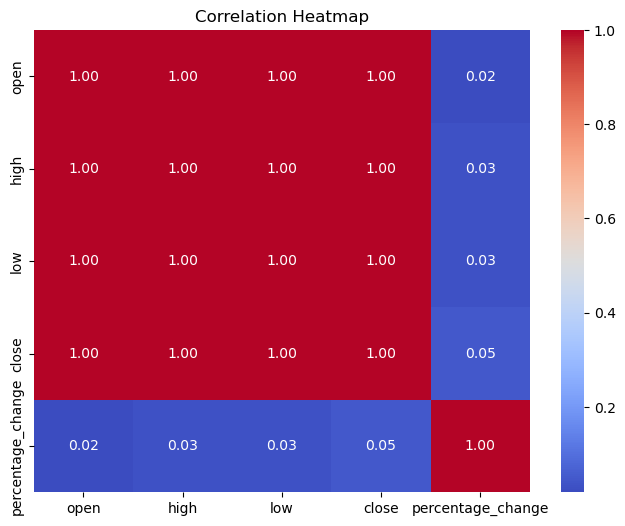

EGX_DLY_COMI, 1D **********
Summary Statistics:
              open         high          low        close
count  5529.000000  5529.000000  5529.000000  5529.000000
mean     15.899816    16.113148    15.704246    15.912883
std      16.095197    16.328115    15.898890    16.119097
min       0.602676     0.602676     0.600312     0.602203
25%       3.450615     3.545152     3.357595     3.469266
50%       7.604309     7.734061     7.476685     7.619199
75%      29.916029    30.390631    29.518197    29.916029
max      89.000000    95.480003    86.000000    89.000000


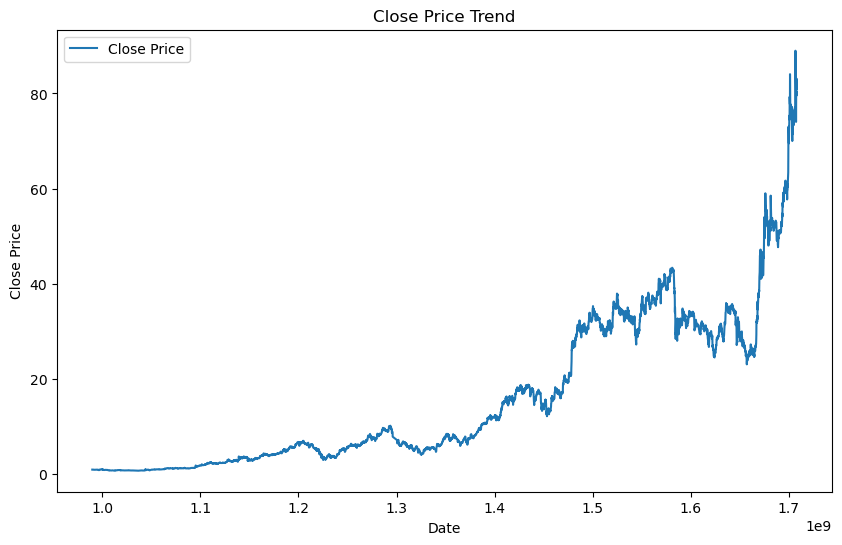

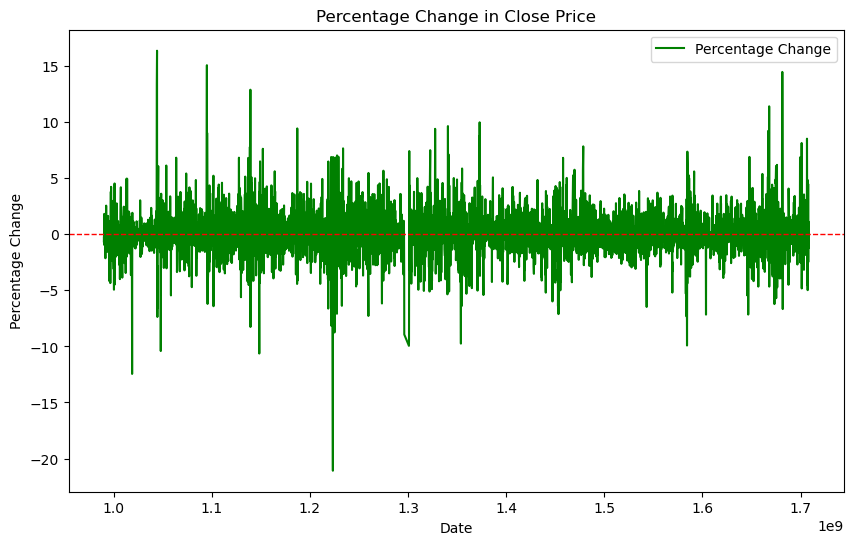

Correlation Matrix:
                       open      high       low     close  percentage_change
open               1.000000  0.999756  0.999798  0.999627          -0.003893
high               0.999756  1.000000  0.999692  0.999848           0.006525
low                0.999798  0.999692  1.000000  0.999813           0.005417
close              0.999627  0.999848  0.999813  1.000000           0.012206
percentage_change -0.003893  0.006525  0.005417  0.012206           1.000000


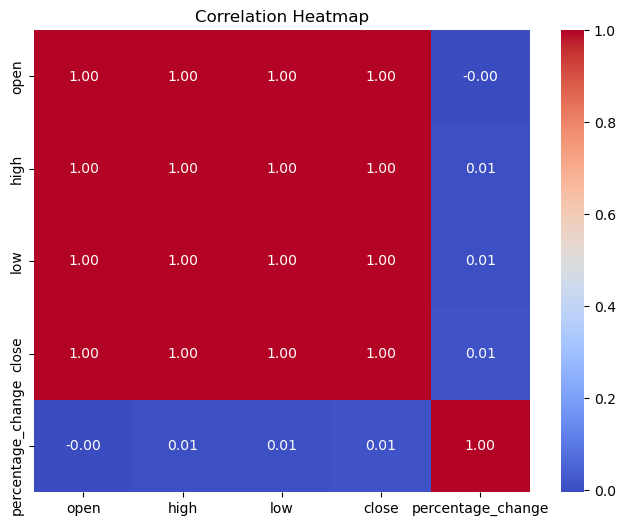

EGX_DLY_ISPH, 1D **********
Summary Statistics:
              open         high          low        close
count  1503.000000  1503.000000  1503.000000  1503.000000
mean      4.560761     4.651105     4.473829     4.561145
std       2.160621     2.191821     2.123005     2.160454
min       1.113000     1.150000     1.101000     1.113000
25%       2.500000     2.558584     2.440000     2.500000
50%       4.448593     4.517165     4.397165     4.448593
75%       6.605794     6.713992     6.464855     6.607626
max       8.489993     8.767191     8.341724     8.489993


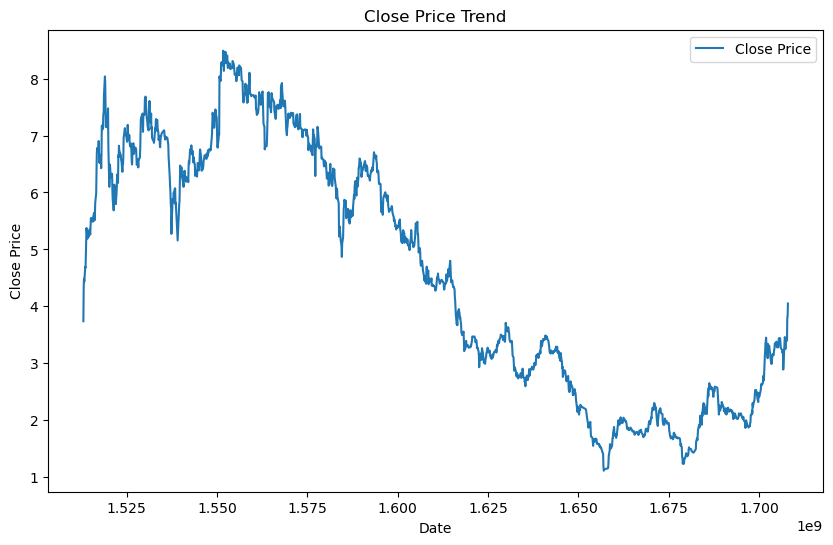

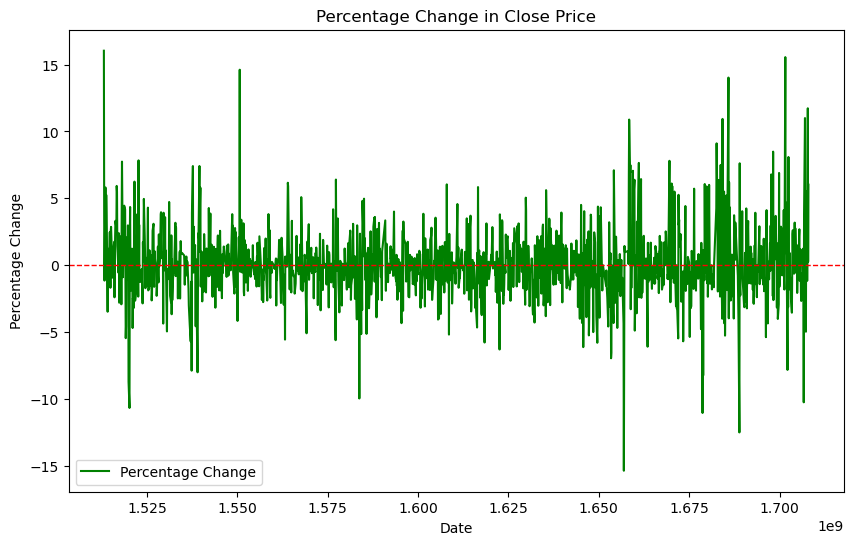

Correlation Matrix:
                       open      high       low     close  percentage_change
open               1.000000  0.998687  0.998999  0.998608          -0.027993
high               0.998687  1.000000  0.998563  0.999458           0.006581
low                0.998999  0.998563  1.000000  0.999322          -0.000940
close              0.998608  0.999458  0.999322  1.000000           0.018342
percentage_change -0.027993  0.006581 -0.000940  0.018342           1.000000


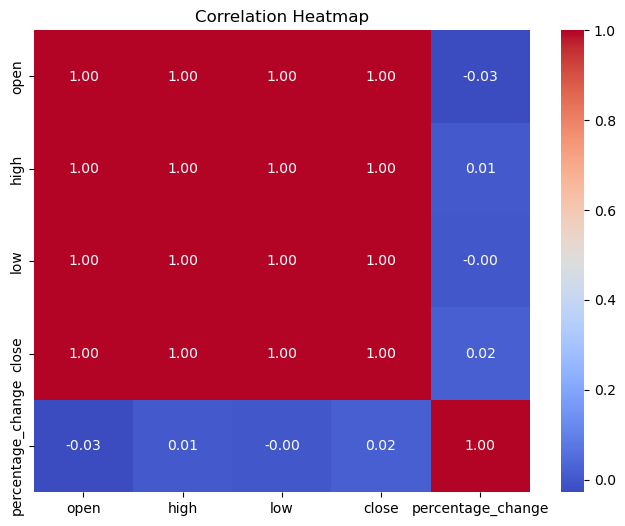

EGX_DLY_EMFD, 1D **********
Summary Statistics:
              open         high         low        close
count  2141.000000  2141.000000  2141.00000  2141.000000
mean      2.899673     2.956688     2.84716     2.901172
std       0.673966     0.698239     0.65741     0.679222
min       1.000000     1.000000     1.00000     1.000000
25%       2.470000     2.510000     2.42000     2.470000
50%       2.760000     2.810000     2.71000     2.760000
75%       3.170000     3.230000     3.12000     3.170000
max       6.690000     7.050000     6.55000     6.880000


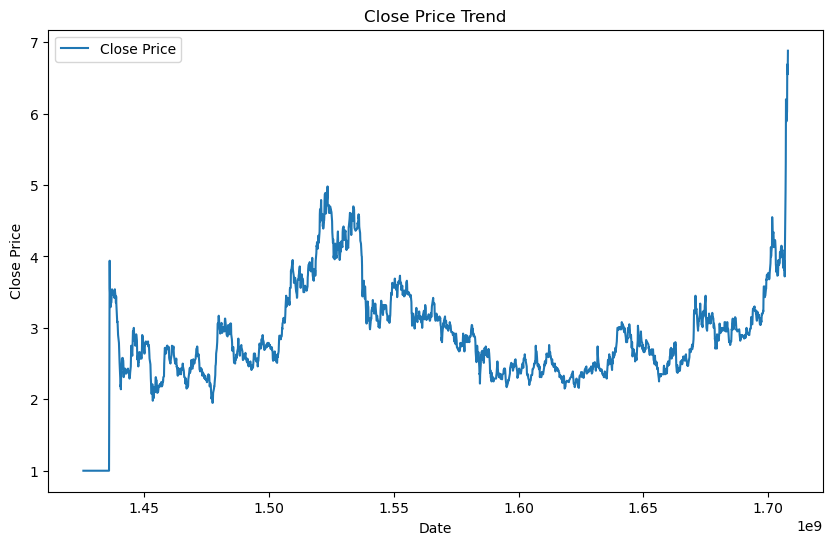

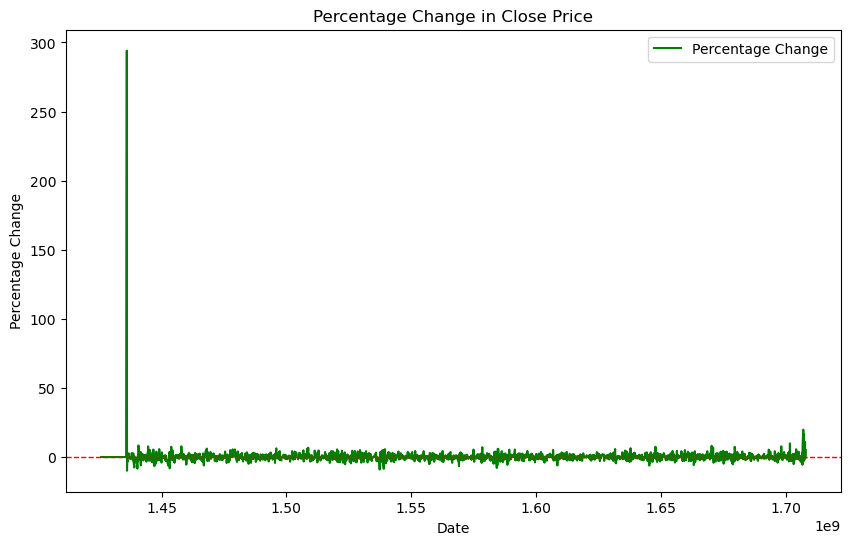

Correlation Matrix:
                       open      high       low     close  percentage_change
open               1.000000  0.995796  0.996803  0.994708           0.036137
high               0.995796  1.000000  0.995554  0.998538           0.056762
low                0.996803  0.995554  1.000000  0.997255           0.045535
close              0.994708  0.998538  0.997255  1.000000           0.063022
percentage_change  0.036137  0.056762  0.045535  0.063022           1.000000


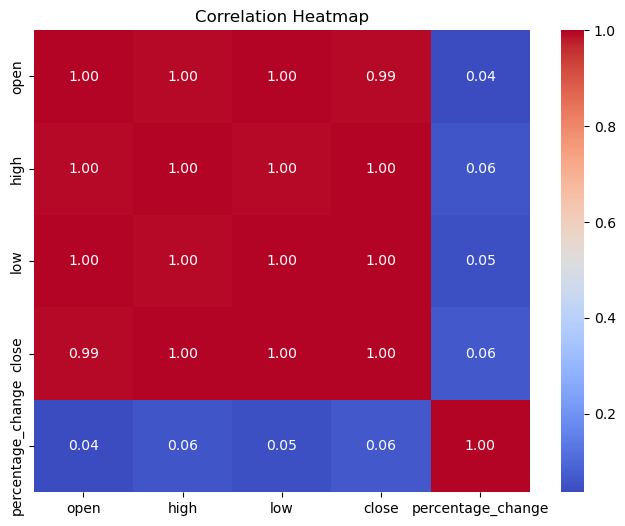

In [2]:
# Load and preprocess the data for each file
file_names = [
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_EGX30, 1D.csv",
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_COMI, 1D.csv",
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_ISPH, 1D.csv",
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_EMFD, 1D.csv"
]

for file_name in file_names:
    df = pd.read_csv(file_name, index_col='time')  # Setting index to 'time'
    
    # Display the DataFrame with date values
    print(os.path.splitext(os.path.basename(file_name))[0],"*"*10)
    
    # Summary statistics
    print("Summary Statistics:")
    print(df.describe())
    
    # Visualize price trends
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['close'], label='Close Price')
    plt.title('Close Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
    # Calculate and visualize percentage change
    df['percentage_change'] = df['close'].pct_change() * 100
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['percentage_change'], label='Percentage Change', color='green')
    plt.title('Percentage Change in Close Price')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add zero line
    plt.legend()
    plt.show()
    
    # Correlation matrix
    correlation_matrix = df.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Heatmap of correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

    print("=" * 100)

# Test Code To Select Best Model to used

In [3]:
# Load and preprocess the data for each file
file_names = [
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_EGX30, 1D.csv",
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_COMI, 1D.csv",
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_ISPH, 1D.csv",
    r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_EMFD, 1D.csv"
]

for file_name in file_names:
    df = pd.read_csv(file_name)
    
    # Convert Unix timestamps to datetime objects
    df['time'] = pd.to_datetime(df['time'], unit='s')
    
    # Display the DataFrame with date values
    print(os.path.splitext(os.path.basename(file_name))[0],'*'*10)

    print(df)
    
    # Plot candlestick chart
    fig = go.Figure(data=[go.Candlestick(x=df["time"],
                                         open=df["open"],
                                         high=df["high"],
                                         low=df["low"],
                                         close=df["close"])])
    fig.update_layout(title=file_name, xaxis_rangeslider_visible=True)
     # Define output directory
    output_directory = r"C:\Users\Abd-ALrahman\Downloads\CFH"
    
    # Extract the base filename without directory path or extension
    file_name_without_extension = os.path.splitext(os.path.basename(file_name))[0]
    
    # Define the output file name
    output_file_name = os.path.join(output_directory, f"{file_name_without_extension}_candlestick_chart.html")
    
    # Write the Plotly chart to HTML file
    fig.write_html(output_file_name)
    # Set 'Date' column as index
    df.set_index('time', inplace=True)

    # Resample the data annually and calculate the growth rate
    annual_close = df.resample('Y')['close'].last()
    growth_rate = annual_close.pct_change() * 100

    # Display the growth rate per year
    print("Growth Rate per Year:")
    print(growth_rate)
    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[['open', 'high', 'low', 'close']])
    df_scaled = pd.DataFrame(scaled_features, columns=['open', 'high', 'low', 'close'])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['close'], test_size=0.2, random_state=42)
     
    # Train Linear Regression model
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    
    # Train Random Forest Regression model
    random_forest_reg = RandomForestRegressor(random_state=42)
    random_forest_reg.fit(X_train, y_train)
    
    # Train and evaluate the Neural Network model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
    
    # Predict using Linear Regression model
    predicted_values_lr = linear_reg.predict(scaled_features)
    # Predict using Linear Regression model
    linear_reg_preds = linear_reg.predict(X_test)
    linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
    linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
    
    # Predict using Random Forest Regression model
    random_forest_preds = random_forest_reg.predict(X_test)
    random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
    random_forest_mse = mean_squared_error(y_test, random_forest_preds)
    
    # Predict using Neural Network model
    nn_preds = model.predict(X_test)
    nn_mae = mean_absolute_error(y_test, nn_preds)
    nn_mse = mean_squared_error(y_test, nn_preds)
    
    # Compare predictions and actual values for each model
    print("Model: Linear Regression")
    print("MAE:", linear_reg_mae)
    print("MSE:", linear_reg_mse)
    
    print("Model: Random Forest Regression")
    print("MAE:", random_forest_mae)
    print("MSE:", random_forest_mse)
    
    print("Model: Neural Network")
    print("MAE:", nn_mae)
    print("MSE:", nn_mse)
    print("=" * 100)
    

EGX_DLY_EGX30, 1D **********
                    time          open          high           low  \
0    2009-10-20 08:00:00   7131.700195   7157.509766   7123.200195   
1    2009-10-21 08:00:00   7139.060059   7139.290039   7062.069824   
2    2009-10-22 08:00:00   7042.229980   7101.700195   7002.209961   
3    2009-10-25 08:00:00   7133.209961   7207.540039   7131.310059   
4    2009-10-26 08:00:00   7177.479980   7261.759766   7174.229980   
...                  ...           ...           ...           ...   
3462 2024-02-11 08:00:00  28439.000000  28622.000000  27972.301000   
3463 2024-02-12 08:00:00  28327.900000  28690.500000  27681.199000   
3464 2024-02-13 08:00:00  28545.500000  28839.400000  28306.600000   
3465 2024-02-14 08:00:00  28633.699000  28973.400000  28601.500000   
3466 2024-02-15 08:00:00  28994.300000  29073.500000  28810.300000   

             close  
0      7145.149902  
1      7062.089844  
2      7101.700195  
3      7188.750000  
4      7249.549805  
... 

F:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



22/22 [==============================] - 1s 2ms/step
Model: Linear Regression
MAE: 4.586133586245479e-12
MSE: 3.184734751046651e-23
Model: Random Forest Regression
MAE: 8.239897874307887
MSE: 887.5322074258302
Model: Neural Network
MAE: 0.47869387939027724
MSE: 0.6713359723623253
EGX_DLY_COMI, 1D **********
                    time       open       high        low      close
0    2001-05-15 07:00:00   0.839019   0.839019   0.827202   0.831220
1    2001-05-16 07:00:00   0.827202   0.836419   0.823184   0.826020
2    2001-05-17 07:00:00   0.827202   0.827202   0.820111   0.824366
3    2001-05-20 07:00:00   0.815621   0.821293   0.815385   0.816566
4    2001-05-21 07:00:00   0.813257   0.850836   0.809476   0.831456
...                  ...        ...        ...        ...        ...
5524 2024-02-11 08:00:00  80.489998  80.500000  78.019997  79.550003
5525 2024-02-12 08:00:00  79.550003  84.500000  78.750000  83.120003
5526 2024-02-13 08:00:00  83.120003  83.120003  80.019997  81.059998
5

F:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



35/35 [==============================] - 0s 2ms/step
Model: Linear Regression
MAE: 6.755395921175331e-15
MSE: 9.0483863726331e-29
Model: Random Forest Regression
MAE: 0.017361154027324535
MSE: 0.009980951263991525
Model: Neural Network
MAE: 0.003186662345226141
MSE: 1.7710139081040882e-05
EGX_DLY_ISPH, 1D **********
                    time      open      high       low     close
0    2017-12-11 08:00:00  3.738949  3.738949  3.738949  3.738949
1    2017-12-12 08:00:00  3.738949  4.448060  3.738949  4.338470
2    2017-12-13 08:00:00  4.338470  4.583436  4.338470  4.486739
3    2017-12-14 08:00:00  4.486739  4.544757  4.383596  4.435167
4    2017-12-17 08:00:00  4.435167  4.834848  4.435167  4.693026
...                  ...       ...       ...       ...       ...
1498 2024-02-11 08:00:00  3.430000  3.520000  3.330000  3.390000
1499 2024-02-12 08:00:00  3.390000  3.460000  3.330000  3.410000
1500 2024-02-13 08:00:00  3.410000  4.080000  3.400000  3.810000
1501 2024-02-14 08:00:00  3.8100

F:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



10/10 [==============================] - 0s 2ms/step
Model: Linear Regression
MAE: 9.185712360553123e-15
MSE: 1.0012964295564011e-28
Model: Random Forest Regression
MAE: 0.004687082936877141
MSE: 0.0001081231108304051
Model: Neural Network
MAE: 0.0002763973870555399
MSE: 5.341577866890204e-07
EGX_DLY_EMFD, 1D **********
                    time  open  high   low  close
0    2015-03-05 08:00:00  1.00  1.00  1.00   1.00
1    2015-03-08 08:00:00  1.00  1.00  1.00   1.00
2    2015-03-09 08:00:00  1.00  1.00  1.00   1.00
3    2015-03-10 08:00:00  1.00  1.00  1.00   1.00
4    2015-03-11 08:00:00  1.00  1.00  1.00   1.00
...                  ...   ...   ...   ...    ...
2136 2024-02-11 08:00:00  5.89  6.35  5.85   6.03
2137 2024-02-12 08:00:00  6.03  6.87  5.90   6.69
2138 2024-02-13 08:00:00  6.69  6.89  6.50   6.62
2139 2024-02-14 08:00:00  6.62  6.69  6.42   6.55
2140 2024-02-15 08:00:00  6.55  7.05  6.55   6.88

[2141 rows x 5 columns]
Growth Rate per Year:
time
2015-12-31          NaN
20

F:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Model: Linear Regression
MAE: 4.684157749583994e-16
MSE: 2.455996145771128e-31
Model: Random Forest Regression
MAE: 0.0020312354702811852
MSE: 0.0008341462470862627
Model: Neural Network
MAE: 0.00011032154510072071
MSE: 7.334656581130201e-08


### EGX_DLY_EGX30, 1D:

Linear Regression:
MAE: 4.586133586245479e-12
MSE: 3.184734751046651e-23
Random Forest Regression:
MAE: 8.239897874307887
MSE: 887.5322074258302
Neural Network:
MAE: 0.6262186544263013
MSE: 0.8602422649968761
Conclusion: Linear Regression model performed the best with the lowest MAE and MSE.
### EGX_DLY_COMI, 1D:

Linear Regression:
MAE: 6.755395921175331e-15
MSE: 9.0483863726331e-29
Random Forest Regression:
MAE: 0.017361154027324535
MSE: 0.009980951263991525
Neural Network:
MAE: 0.001683474757232436
MSE: 4.7260480755250615e-06
Conclusion: Neural Network model performed the best with the lowest MAE and MSE.
### EGX_DLY_ISPH, 1D:

Linear Regression:
MAE: 9.185712360553123e-15
MSE: 1.0012964295564011e-28
Random Forest Regression:
MAE: 0.004687082936877141
MSE: 0.0001081231108304051
Neural Network:
MAE: 0.0011080319184992049
MSE: 1.5868650562445682e-05
Conclusion: Neural Network model performed the best with the lowest MAE and MSE.
### EGX_DLY_EMFD, 1D:

Linear Regression:
MAE: 4.684157749583994e-16
MSE: 2.455996145771128e-31
Random Forest Regression:
MAE: 0.0020312354702811852
MSE: 0.0008341462470862627
Neural Network:
MAE: 0.00042522463765176796
MSE: 2.719658590423578e-07
### Conclusion: Neural Network model performed the best with the lowest MAE and MSE.
Overall, the Neural Network model consistently outperformed the other models across all datasets based on the evaluation metrics (MAE, MSE), making it the most suitable model for these datasets. However, it's essential to consider the specific characteristics of each dataset and the problem domain when selecting the final model for deployment.

# Neural Network Model

In [2]:
# load dataset
data = pd.read_csv(r"C:\Users\Abd-ALrahman\Downloads\CFH\EGX_DLY_EGX30, 1D.csv")['close']
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
data_normalized = scaler.fit_transform(np.array(data).reshape(-1,1))

# Split data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

# Function to create dataset with lookback
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 30  # Number of previous days to use for prediction
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [3]:
# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Un-normalize the data
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])


Epoch 1/100

86/86 [==============================] - 11s 36ms/step - loss: 0.0048
Epoch 2/100
86/86 [==============================] - 3s 40ms/step - loss: 9.2461e-04
Epoch 3/100
86/86 [==============================] - 3s 36ms/step - loss: 9.0575e-04
Epoch 4/100
86/86 [==============================] - 3s 33ms/step - loss: 7.9610e-04
Epoch 5/100
86/86 [==============================] - 3s 32ms/step - loss: 6.4121e-04
Epoch 6/100
86/86 [==============================] - 3s 32ms/step - loss: 6.7605e-04
Epoch 7/100
86/86 [==============================] - 3s 32ms/step - loss: 6.4036e-04
Epoch 8/100
86/86 [==============================] - 3s 34ms/step - loss: 5.7564e-04
Epoch 9/100
86/86 [==============================] - 4s 49ms/step - loss: 5.4472e-04
Epoch 10/100
86/86 [==============================] - 3s 35ms/step - loss: 5.8483e-04
Epoch 11/100
86/86 [==============================] - 3s 35ms/step - loss: 5.8736e-04
Epoch 12/100
86/86 [==============================] - 4s 42ms/st

Epoch 92/100
86/86 [==============================] - 4s 44ms/step - loss: 1.9532e-04
Epoch 93/100
86/86 [==============================] - 3s 38ms/step - loss: 1.9845e-04
Epoch 94/100
86/86 [==============================] - 3s 39ms/step - loss: 2.1158e-04
Epoch 95/100
86/86 [==============================] - 3s 32ms/step - loss: 1.9869e-04
Epoch 96/100
86/86 [==============================] - 3s 40ms/step - loss: 2.2208e-04
Epoch 97/100
86/86 [==============================] - 3s 39ms/step - loss: 2.0653e-04
Epoch 98/100
86/86 [==============================] - 3s 35ms/step - loss: 2.0376e-04
Epoch 99/100
86/86 [==============================] - 2s 29ms/step - loss: 1.8643e-04
Epoch 100/100
21/21 [==============================] - 1s 11ms/step


Mean Absolute Percentage Error (MAPE): 1.3696991851349039


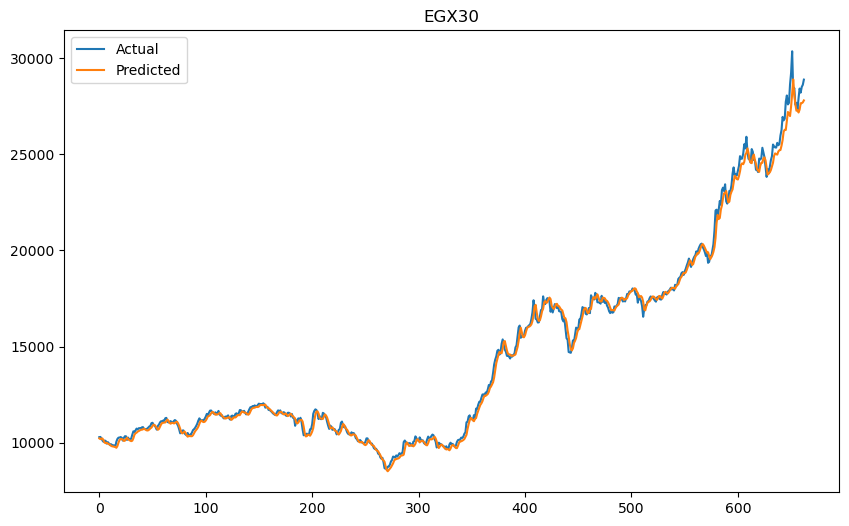

In [5]:
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate the MAPE
mape = calculate_mape(y_test.flatten(), predictions.flatten())
print('Mean Absolute Percentage Error (MAPE):', mape)

# Plot the actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.flatten(), label='Actual')
plt.plot(predictions.flatten(), label='Predicted')
plt.title('EGX30')
plt.legend()
plt.show()

In [6]:
# Get the last 30 days of data
last_30_days = data_normalized[-look_back:]

# Reshape the data for LSTM input
last_30_days = np.reshape(last_30_days, (1, look_back, 1))

# Predict the price after 7 days
predicted_price = model.predict(last_30_days)

# Un-normalize the predicted price
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted CLOSE 7 days:", predicted_price[0][0])

1/1 [==============================] - 0s 31ms/step
Predicted CLOSE 7 days: 28113.74
